#Modify the Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
import matplotlib.pyplot as plt
import pandas as pd

#Load the IMDB Dataset

This dataset contains movie reviews labeled as positive or negative.

In [ ]:
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training samples: 25000, Test samples: 25000


*  IMDB dataset consists of movie reviews labeled as positive (1) or negative (0).
*  We limit vocabulary to 10,000 words to keep the model manageable.
*  Padding sequences ensures all reviews are the same length, making them compatible with the neural network.




# Model configurations

This function allows flexibility in adjusting hidden units, activation functions, loss functions, and dropout.

In [ ]:
def create_model(hidden_units=64, activation='relu', loss='binary_crossentropy', dropout_rate=None):
    """
    Creates a simple feedforward neural network for sentiment analysis.

    Parameters:
    - hidden_units: Number of neurons in the hidden layer(s).
    - activation: Activation function for the hidden layer(s).
    - loss: Loss function for the model (default is binary_crossentropy for classification).
    - dropout_rate: If specified, applies dropout regularization to prevent overfitting.

    Returns:
    - Compiled Keras model ready for training.
    """
    model = tf.keras.Sequential([
        Embedding(input_dim=max_features, output_dim=128),  # Converts words into dense vectors
        Flatten(),  # Flattens the output to feed into Dense layers
        Dense(hidden_units, activation=activation)  # Hidden layer with specified activation function
    ])

    # Apply dropout if specified
    if dropout_rate:
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (positive/negative)

    # Compile model with Adam optimizer and chosen loss function
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    return model

*   Embedding layer: Converts words into meaningful numerical representations.
*   Flatten layer: Transforms the output into a format suitable for dense layers.
*   Hidden layer: The number of neurons and activation function can be adjusted.
*  Dropout layer: Randomly deactivates neurons during training to prevent overfitting.


*  Output layer: Uses a sigmoid activation to classify reviews as positive or negative.
*   Binary cross-entropy loss: Optimized for classification problems.






# Model variations

Experimenting with different hidden layers, activations, losses, and units.

In [ ]:
models = {
    "One Hidden Layer (64 units)": create_model(hidden_units=64),
    "Three Hidden Layers": tf.keras.Sequential([
        Embedding(input_dim=max_features, output_dim=128),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "Tanh Activation + MSE Loss": create_model(hidden_units=64, activation='tanh', loss='mse'),
    "Dropout Regularization": create_model(hidden_units=64, dropout_rate=0.5),
    "Fewer Units (32)": create_model(hidden_units=32),
    "More Units (128)": create_model(hidden_units=128)
}
# Ensure models requiring explicit compilation are compiled
models["Three Hidden Layers"].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*   One Hidden Layer (64 units) → Baseline model.
*   Three Hidden Layers → Tests if deeper networks improve performance.
*  Tanh Activation + MSE Loss → Evaluates older methods against modern best practices.
*   Dropout Regularization → Adds dropout to test overfitting reduction.
*   Fewer Units (32) & More Units (128) → Tests whether increasing or decreasing neurons improves accuracy








# Train and evaluate models

Training each model for 5 epochs and evaluating on the test set.

In [ ]:
def train_and_evaluate(model):
    model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    val_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    test_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    return val_accuracy, test_accuracy

# Evaluate all models and collect results

Storing validation and test accuracies for comparison.

In [ ]:
results = {name: train_and_evaluate(model) for name, model in models.items()}



*  Training for 5 epochs: Chosen for quick experimentation (longer training could improve results).
*  Validation split (0.2):Uses 20% of training data to monitor overfitting.
*  Evaluating accuracy: Both validation and test accuracy are measured.





#Summarize results in a DataFrame

Creating a table for clear presentation of model performances.

In [ ]:
summary = pd.DataFrame([
    {"Model": name, "Validation Accuracy": val_acc, "Test Accuracy": test_acc}
    for name, (val_acc, test_acc) in results.items()
])

# Visualize the results

Bar chart comparing validation and test accuracies for each model.

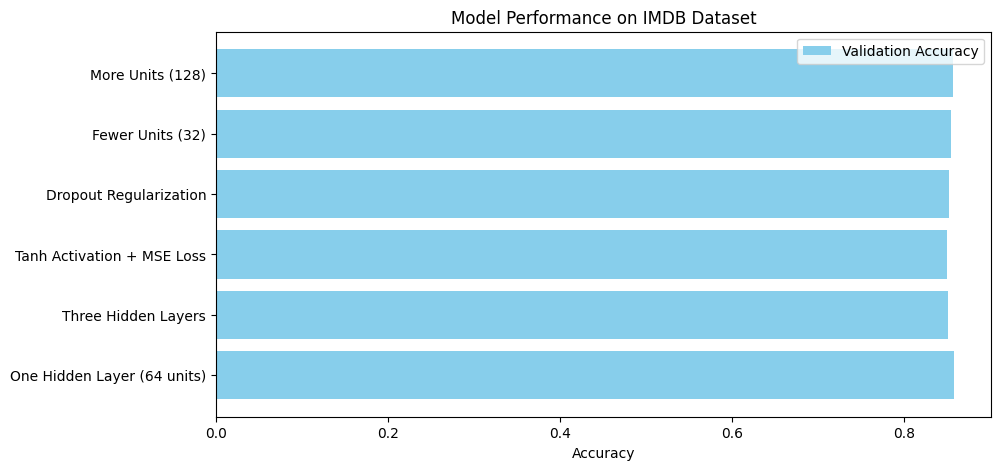

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(summary['Model'], summary['Validation Accuracy'], color='skyblue', label='Validation Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance on IMDB Dataset')
plt.legend()
plt.show()

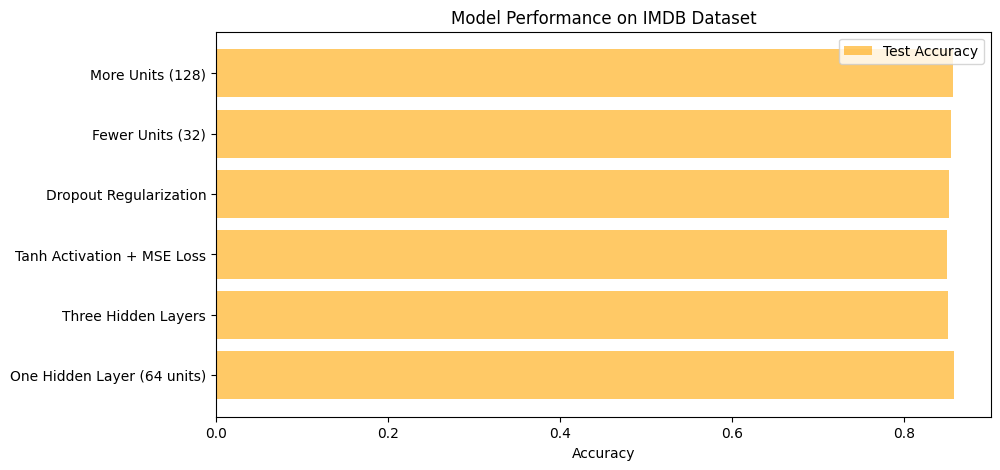

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(summary['Model'], summary['Test Accuracy'], color='orange', alpha=0.6, label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance on IMDB Dataset')
plt.legend()
plt.show()

# Display summary

In [ ]:
print(summary)

                         Model  Validation Accuracy  Test Accuracy
0  One Hidden Layer (64 units)              0.85804        0.85804
1          Three Hidden Layers              0.85156        0.85156
2   Tanh Activation + MSE Loss              0.84952        0.84952
3       Dropout Regularization              0.85224        0.85224
4             Fewer Units (32)              0.85472        0.85472
5             More Units (128)              0.85708        0.85708
